This notebook does the same as notebook 2 but just for the singular spectrum ZTF20acquetr_20201116_P60_v1.ascii that umut wanted at the end

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from astropy.io import ascii
import datetime 
from astropy.time import Time
from extinction import ccm89, apply, remove

In [8]:
table = pd.read_csv(r"C:\Users\senan\OneDrive\Desktop\Capstone\ztfcosmoidr\dr2\tables\ztfdr2_salt2_params.csv")

ztfname = np.array(table['ztfname'])
z = np.array(table['z'])
z_err = np.array(table['z_err'])
x1 = np.array(table['x1'])
x1_err = np.array(table['x1_err'])
t0 = np.array(table['t0'])
t0_err = np.array(table['t0_err'])
mwebv = np.array(table['mwebv'])
mwebv_err = np.array(table['mwebv_err'])

#print(ztfname[1])
print(len(ztfname))

a=0
filename = "ZTF20acquetr"
for i in range(len(ztfname)):
    #print(a)
    #print(ztfname[i])
    if ztfname[i] == filename:
        ztfname1 = ztfname[i]
        z1 = z[i]
        z_err1 = z_err[i]
        x11 = x1[i]
        x1_err1 = x1_err[i]
        t01 = t0[i]
        t0_err1 = t0_err[i]
        mwebv1 = mwebv[i]
        mwebv_err1 = mwebv_err[i]
    else:
        a += 1

print(a, ztfname1, z1, z_err1, t01, t0_err1, x11, x1_err1, mwebv1, mwebv_err1)

3628
3627 ZTF20acquetr 0.03109934 0.0 59175.44388972 0.1534695 -2.35080304 0.21425015 0.00891502 0.0


In [9]:
specfile = r"C:\Users\senan\OneDrive\Desktop\Capstone\ZTF20acquetr_20201116_P60_v1.ascii"

date = specfile[54:58] + '-' + specfile[58:60] + '-' + specfile[60:62]
date1 = specfile[54:62]
t = Time(date)
mjd = t.mjd

phase = mjd - t01

In [10]:
categories = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\ztfcosmoidr\dr2\tables\ztfdr2_classifications.csv')
ztfname_categories = np.array(categories['ztfname'])
sn_type = np.array(categories['sn_type'])
sub_type = np.array(categories['sub_type'])

for i in range(len(ztfname_categories)):
    if ztfname_categories[i] == ztfname1:
        sn_type1 = sn_type[i]
        sub_type1 = sub_type[i]

print(sn_type1, sub_type1)

snia-pec 91bg


In [11]:
filename = 'ZTF20acquetr_20201116_P60_v1.ascii'
file_string = filename.replace('.ascii', '_')
deredfilename = file_string + 'dereddened.csv'
deredfilename

'ZTF20acquetr_20201116_P60_v1_dereddened.csv'

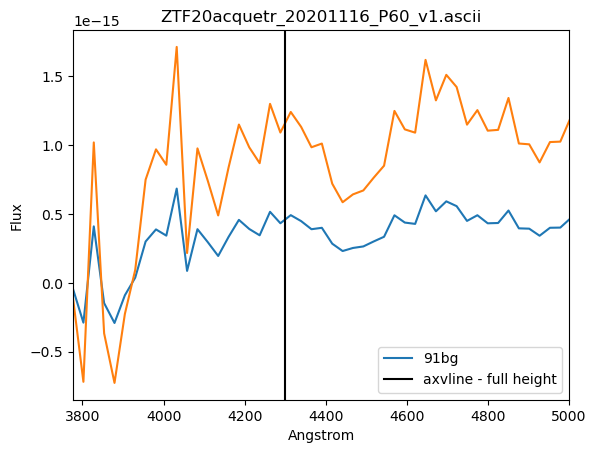

In [12]:
spectrum = ascii.read(specfile)
spectrum = np.array(spectrum)
angstrom = []
flux = []
    
for i in range(len(spectrum)):
    angstrom.append(spectrum[i][0])         #picking out all the wavelength and flux data because they are arranged unhelpfully to begin with
    flux.append(spectrum[i][1])
    
flux = np.array(flux)
angstrom = np.array(angstrom)
#angstrom = angstrom/(1+z1)      #correcting for the redshift 
waveno = 1/(angstrom * 1e-4)                #wave number in inverse microns
#A_v = 1
#R_v = A_v / mwebv1
R_v = 3.1
A_V = R_v * mwebv1
deredden_flux = remove(ccm89(waveno, A_v, R_v, unit='invum'), flux)

wavel_flux = {'wl':angstrom, 'fl':deredden_flux}
ChangeFileFormat = pd.DataFrame(wavel_flux)
#ChangeFileFormat.to_csv(deredfilename)

plt.title(filename)
plt.xlabel("Angstrom")
plt.ylabel("Flux")
if min(angstrom) < 3000:
    plt.xlim(3000,5000)
else:
    plt.xlim(min(angstrom),5000)
plt.plot(angstrom,flux, label=sub_type1)
plt.plot(angstrom,deredden_flux)
plt.axvline(x = 4300, color = 'k', label = 'axvline - full height')         #adding a vertical line around the Ti II feature we want to look at 
plt.legend()

In [13]:
allinfo = {'ztfname':np.array([ztfname1]), 'File Name':np.array([filename]), 'Dereddened File Name':np.array([deredfilename]), 'Date of spectrum':np.array([date1]), 'MJD of spectrum':np.array([mjd]), 't0':np.array([t01]), 'Phase of spectrum':np.array([phase]), 't0_err':np.array([t0_err1]), 'z':np.array([z1]), 'z_err':np.array([z_err1]), 'x1':np.array([x11]), 'x1_err':np.array([x1_err1]), 'MWEBV':np.array([mwebv1]), 'MWEBV_err':np.array([mwebv_err1]), 'SN Type':np.array([sn_type1]), 'SN Sub Type':np.array([sub_type1])}
allinfotable = pd.DataFrame(allinfo)
allinfotable
#allinfotable.to_csv('ZTF20acquetr_info.csv')

,ztfname,File Name,Dereddened File Name,Date of spectrum,MJD of spectrum,t0,Phase of spectrum,t0_err,z,z_err,x1,x1_err,MWEBV,MWEBV_err,SN Type,SN Sub Type
0,ZTF20acquetr,ZTF20acquetr_20201116_P60_v1.ascii,ZTF20acquetr_20201116_P60_v1_dereddened.csv,20201116,59169.0,59175.44389,-6.44389,0.15347,0.031099,0.0,-2.350803,0.21425,0.008915,0.0,snia-pec,91bg
